In [79]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [80]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


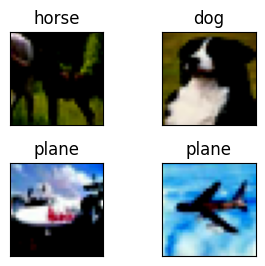

In [81]:
# Exibição de imagens de treinamento para cada classe de dados 

dataiter = iter(trainloader)
images, labels = next(dataiter)

fig = plt.figure(figsize=(3, 3))
for i in range(4):
    plt.subplot(2, 2, i+1);
    plt.tight_layout();
    plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)));
    plt.title(f"{classes[labels[i]]}");
    plt.xticks([]);
    plt.yticks([]);

In [82]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # Camada convolucional 1: 3 canais de entrada (RGB), 6 canais de saída e filtro 5x5
        self.pool1 = nn.MaxPool2d(2, 2)  # Camada de pooling 1: janela de pooling 2x2
        
        self.conv2 = nn.Conv2d(6, 12, 5) # Camada convolucional 2: 6 canais de entrada, 12 canais de saída e filtro 5x5
        self.pool2 = nn.MaxPool2d(2, 2) # Camada de pooling 2: janela de pooling 2x2
        
        # self.conv3 = nn.Conv2d(12, 12, 3) # Adicionando uma terceira camada convolucional com 12 canais de entrada, 24 canais de saída e filtro 3x3
        # self.pool3 = nn.MaxPool2d(2, 2) # Camada de pooling 3: janela de pooling 2x2
        
        self.fc1 = nn.Linear(12 * 5 * 5, 120) # Camada densa 1: 12 * 5 * 5 neurônios de entrada, 120 neurônios de saída
        self.fc2 = nn.Linear(120, 84) # Camada densa 2: 120 neurônios de entrada, 84 neurônios de saída
        self.fc3 = nn.Linear(84, 10) # Camada densa 3: 84 neurônios de entrada, 10 neurônios de saída

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x))) # Passa a entrada x pela primeira camada convolucional, aplica a função de ativação ReLU e depois faz o pooling
        x = self.pool2(F.relu(self.conv2(x))) # Passa a saída da primeira camada convolucional pela segunda camada convolucional, aplica a função de ativação ReLU e depois faz o pooling
        # x = self.pool3(F.relu(self.conv3(x))) # Passa a saída da segunda camada convolucional pela terceira camada convolucional, aplica a função de ativação ReLU e depois faz o pooling
        
        x = torch.flatten(x, 1)  # Achatamento do tensor x (removendo as dimensões extras, exceto a dimensão de lote)
        x = F.relu(self.fc1(x))  # Passa a saída achatada pela primeira camada densa e aplica a função de ativação ReLU
        x = F.relu(self.fc2(x))  # Passa a saída da primeira camada densa pela segunda camada densa e aplica a função de ativação ReLU
        x = self.fc3(x)  # Passa a saída da segunda camada densa pela terceira camada densa, que retorna a saída final da rede neural
       
        return x


net = Net()

- Treinamento

In [83]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [84]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Pega as entradas; dados é uma lista de [entradas, rótulos]
        inputs, labels = data

        # Zera os parâmetros do gradiente
        optimizer.zero_grad()

        # Saidas da rede neural
        outputs = net(inputs)
        # Calcula a perda
        loss = criterion(outputs, labels)
        # Calcula o gradiente
        loss.backward()
        # Atualiza os parâmetros
        optimizer.step()

        # Exibir estatísticas
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.169
[1,  4000] loss: 1.827
[1,  6000] loss: 1.671
[1,  8000] loss: 1.571
[1, 10000] loss: 1.519
[1, 12000] loss: 1.471
[2,  2000] loss: 1.401
[2,  4000] loss: 1.363
[2,  6000] loss: 1.357
[2,  8000] loss: 1.329
[2, 10000] loss: 1.328
[2, 12000] loss: 1.306
[3,  2000] loss: 1.251
[3,  4000] loss: 1.247
[3,  6000] loss: 1.257
[3,  8000] loss: 1.225
[3, 10000] loss: 1.217
[3, 12000] loss: 1.220
[4,  2000] loss: 1.150
[4,  4000] loss: 1.180
[4,  6000] loss: 1.147
[4,  8000] loss: 1.177
[4, 10000] loss: 1.162
[4, 12000] loss: 1.158
Finished Training


- Salvar modelo

In [85]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

- Exibir modelos de teste

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


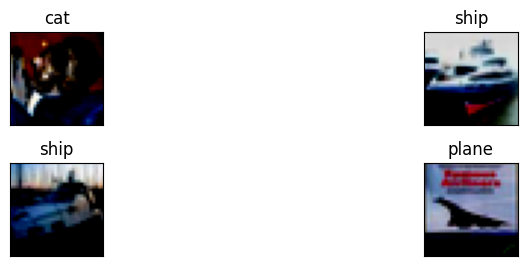

In [86]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
fig = plt.figure(figsize=(10,3))
for i in range(4):
    plt.subplot(2, 2, i+1);
    plt.tight_layout();
    plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)));
    plt.title(f"{classes[labels[i]]}");
    plt.xticks([]);
    plt.yticks([]);

- Importar modelo treinado

In [87]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [88]:
outputs = net(images)

In [89]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [90]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [91]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 55.9 %
Accuracy for class: car   is 62.0 %
Accuracy for class: bird  is 55.1 %
Accuracy for class: cat   is 44.7 %
Accuracy for class: deer  is 45.1 %
Accuracy for class: dog   is 38.6 %
Accuracy for class: frog  is 63.0 %
Accuracy for class: horse is 67.5 %
Accuracy for class: ship  is 75.4 %
Accuracy for class: truck is 56.3 %


In [92]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
